In [1]:
# General Import
import numpy as np
from scipy.interpolate import interp1d
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
# Local Import
from code.abelsolver import AbelSolver

# Test from stereology

#### Generation of synthetic data

In [2]:
N  = 1000 #data sample
h  = 1/N  # time step
nx = 100

In [3]:
exp0 = AbelSolver(a=0.5,p=1,nx=N,kernel=True,methB='explicit')

In [4]:
#standard deviation
std = (0.1-0.01)*random.random() + 0.01
_,y,yd = exp0.DataGen(noise=std)
print(std)

0.05814516320470025


In [5]:
# sub-samplig
f = interp1d(np.linspace(0,1-h,N),yd)
Yd = f(np.linspace(0,1-1/nx,nx))

#### Solving the inverse problem p=1

In [6]:
exp1 = AbelSolver(a=0.5,p=1,kernel=True,methB='explicit')

noise=1.342e-02 inf= 1e-06 , reg= 1e-06
Wrong regularization parameter, too high
delta=1.342e-02, inf=1.000e-06, sup=1.000e-03, reg=1.000e-06


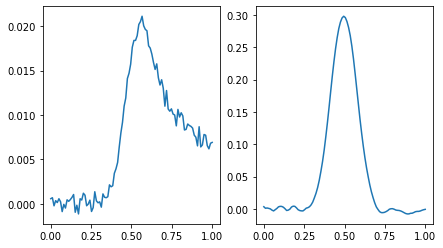

In [7]:
xadp, noise = exp1.BlindSolver(Yd,warning=True,export=True)

#### Solving the inverse problem p=2

noise=1.342e-02 inf= 1e-09 , reg= 1e-09
Wrong regularization parameter, too high
delta=1.342e-02, inf=1.000e-09, sup=1.000e-03, reg=1.000e-09


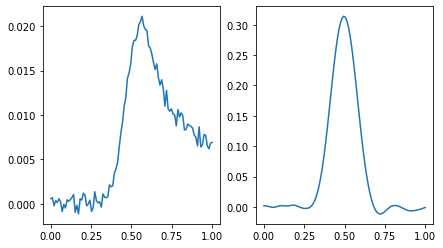

In [8]:
exp2 = AbelSolver(a=0.5,p=2,kernel=True,methB='explicit')
xadp, noise = exp2.BlindSolver(Yd,reg_inf=10**-9,warning=True,export=True)